# Big Mart Sales - Regression Problem - Predict Sales

In [320]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Datasets

In [321]:
df = os.chdir("D:\\Naveen\\Data Science\\Nuclei - Online\\Projects\\Internship Project 1")

In [322]:
train = pd.read_csv("Train_UWu5bXk.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [323]:
test = pd.read_csv("Test_u94Q5KV.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [324]:
#check shape

print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [325]:
#merging the train and test datasets
#We add colums to identify train and test datasets
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [326]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [327]:
#Checking how the numerical data is spread

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,14204.0,1308.865489,1699.791423,0.000,0.000000,559.272000,2163.184200,13086.964800


In [328]:
#Checking Data types of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

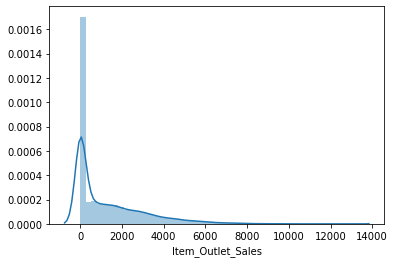

In [329]:
#Checking how the data is spread as we are going to predict the sales

sns.distplot(data['Item_Outlet_Sales'])
plt.show()

# Cleaning the data

In [330]:
#Checking for missing data

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [331]:
#There are also some 0 values and we will treat it as missing values
#Sales will have "0" as we have added that to the test set

data.eq(0).sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [332]:
#imputing missing values using sklearn
#the mean and median are almost equal for Item_Weight and Item_Visibility so we can use either the mean or the median

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan, strategy = 'median')
data.iloc[:, [1]] = impute.fit_transform(data.iloc[:, [1]])
impute = SimpleImputer(missing_values = 0, strategy = 'median')
data.iloc[:, [3]] = impute.fit_transform(data.iloc[:, [3]])

In [333]:
#testing datasets after imputing

data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [334]:
data.eq(0).sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [335]:
#imputing outlet size with mode - the only categorical data with missing values

data['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace = True)

In [336]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [337]:
#We can see that the fat content values are not uniform. 

data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [338]:
#Correct this error and group into 2 values

data.Item_Fat_Content = train.Item_Fat_Content.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'})
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [339]:
#Now checking outlet established years

data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [340]:
#The item identifier is only divided into three using the first letters so we will modify them to sensible categories:
data['Item_Type_New'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_New'] = data['Item_Type_New'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['Item_Type_New'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_New, dtype: int64

In [341]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable


# Exploratory Data Analysis

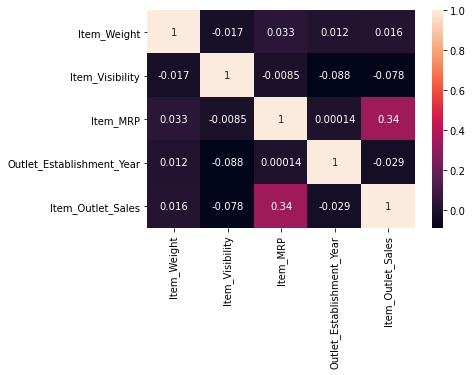

In [342]:
#Checking how the correlation is

sns.heatmap(data.corr(), annot = True)
plt.show()

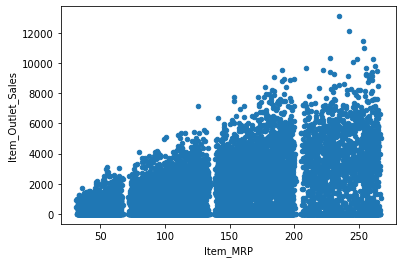

In [343]:
#We can see that MRP is more related to sales

data.plot(x ='Item_MRP', y='Item_Outlet_Sales', kind = 'scatter')

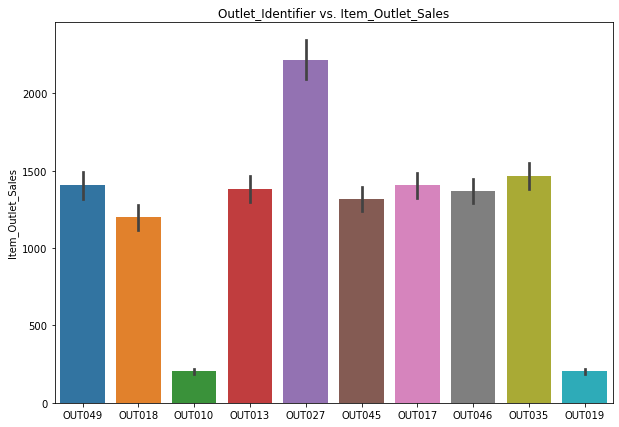

In [344]:
#Checking the relation between outlet type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data)
plot.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

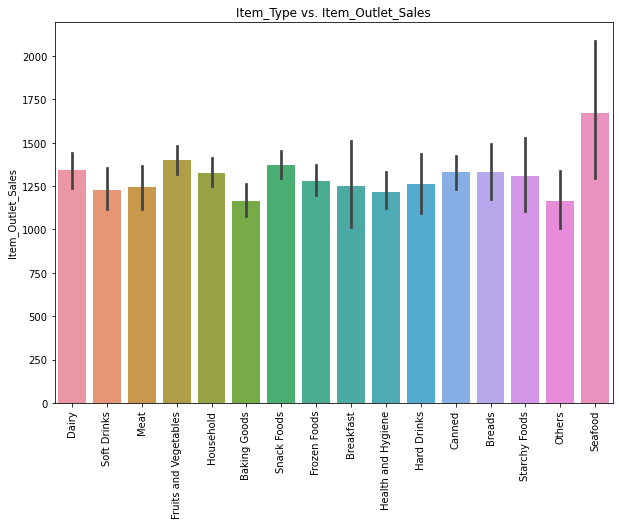

In [345]:
#Checking the relation between item type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=data)
plot.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

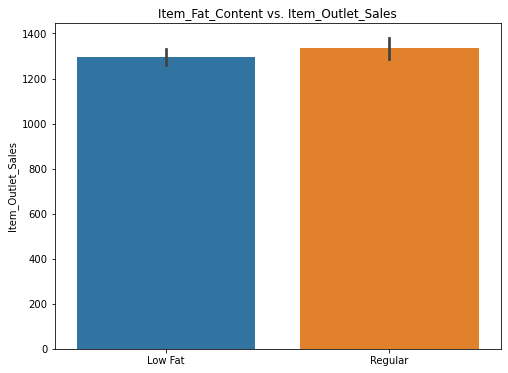

In [346]:
#Checking the relation between item fat content and sales

plt.figure(figsize = (8,6))
plot = sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)
plot.set_title("Item_Fat_Content vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

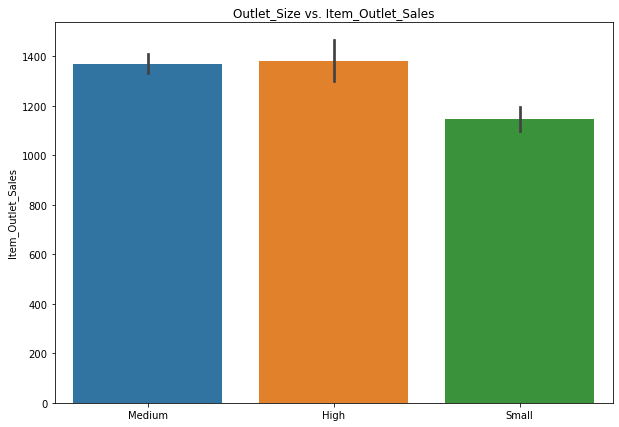

In [347]:
#Checking the relation between outlet size and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)
plot.set_title("Outlet_Size vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

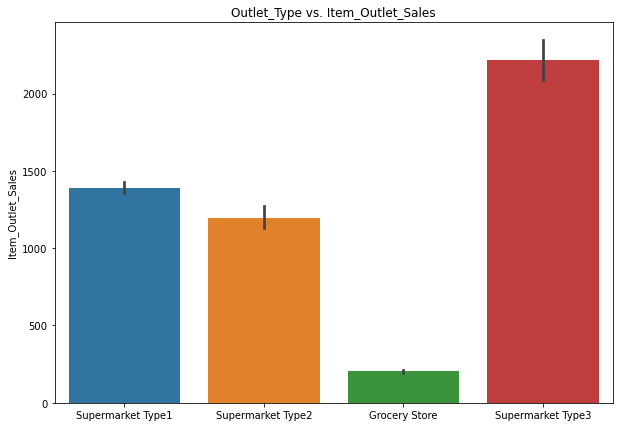

In [348]:
#Checking the relation between outlet type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plot.set_title("Outlet_Type vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

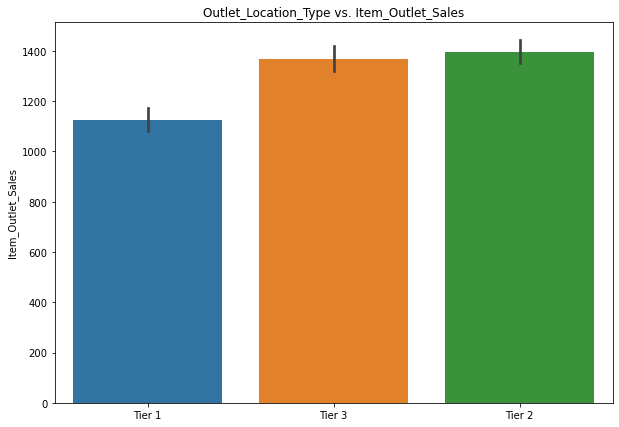

In [349]:
#Checking the relation between outlet location type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)
plot.set_title("Outlet_Location_Type vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

In [350]:
# determining the operation peroid of stores

data['Operating_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Operating_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Operating_Years, dtype: int64

In [351]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_New,Operating_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# Encoding variables

In [352]:
#Creating a new variable to to make Outlet identifier into categories

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
data['Outlet'] = lab_enc.fit_transform(data['Outlet_Identifier'])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_New,Operating_Years,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14,9
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,15,0
4,NCD19,8.93,Low Fat,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26,1


In [353]:
#Converting other categorical variables into numerical values

modify_var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet']
le = LabelEncoder()
for i in modify_var:
    data[i] = le.fit_transform(data[i])

In [354]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_New,Operating_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,14,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,14,9
3,FDX07,19.20,1,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,1,15,0
4,NCD19,8.93,0,0.057851,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,2,26,1


In [355]:
#Encoding variables
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size',
                                     'Outlet_Type','Item_Type_New','Outlet'])

In [356]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Operating_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.057851,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0


In [357]:
data = data.drop('Item_Identifier', axis = 1)
data = data.drop('Outlet_Identifier', axis = 1)
data = data.drop('source', axis = 1)
data = data.drop('Item_Type', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Visibility            14204 non-null  float64
 2   Item_MRP                   14204 non-null  float64
 3   Outlet_Establishment_Year  14204 non-null  int64  
 4   Item_Outlet_Sales          14204 non-null  float64
 5   Operating_Years            14204 non-null  int64  
 6   Item_Fat_Content_0         14204 non-null  uint8  
 7   Item_Fat_Content_1         14204 non-null  uint8  
 8   Outlet_Location_Type_0     14204 non-null  uint8  
 9   Outlet_Location_Type_1     14204 non-null  uint8  
 10  Outlet_Location_Type_2     14204 non-null  uint8  
 11  Outlet_Size_0              14204 non-null  uint8  
 12  Outlet_Size_1              14204 non-null  uint8  
 13  Outlet_Size_2              14204 non-null  uint

# Splitting Data Set

In [358]:
#Splitting data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 30)
(14204,)


In [359]:
#Splitting into train and test 

# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11363, 30)
(11363,)
(2841, 30)
(2841,)


# Fitting into Models

### Linear Regression

In [360]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(n_jobs = -1)
model.fit(x_train, y_train)

#test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))

[2336. 1600. 1088. ... 2048.  416. 1408.]
RMSE : 1542.9685421385798


### Ridge Regression

In [361]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)

#test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))

[2289.23470538 1534.18980564  998.59855656 ... 2024.51833616  374.04651665
 1343.74765031]
RMSE : 1541.4931803804043


### Decision Tree Regression

In [362]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

#test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the Root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

[   0.     1304.968  1877.556  ... 4386.2904    0.     3149.234 ]
RMSE : 2072.317981571709


### Random Forest Regression

In [363]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 500, n_jobs = -1)
model.fit(x_train, y_train)

#test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the Root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

[ 960.3113036 2052.9250568 1018.6833212 ... 3425.4624356  258.7125692
 1561.8363032]
RMSE : 1558.9725341420437


In [366]:
y_pred2 = model.predict(x)

In [367]:
data["Predicted"] = y_pred2

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Visibility            14204 non-null  float64
 2   Item_MRP                   14204 non-null  float64
 3   Outlet_Establishment_Year  14204 non-null  int64  
 4   Item_Outlet_Sales          14204 non-null  float64
 5   Operating_Years            14204 non-null  int64  
 6   Item_Fat_Content_0         14204 non-null  uint8  
 7   Item_Fat_Content_1         14204 non-null  uint8  
 8   Outlet_Location_Type_0     14204 non-null  uint8  
 9   Outlet_Location_Type_1     14204 non-null  uint8  
 10  Outlet_Location_Type_2     14204 non-null  uint8  
 11  Outlet_Size_0              14204 non-null  uint8  
 12  Outlet_Size_1              14204 non-null  uint8  
 13  Outlet_Size_2              14204 non-null  uint

In [369]:
data.to_csv("D:\\Naveen\\Data Science\\Nuclei - Online\\Projects\\Internship Project 1\\pred_Randomforest.csv")